# EDA Student Performance

### Student Performance Indicator

#### Life cycle of Machine learning Project
* Understanding the Problem Statement
* Data Collection
* Data Checks to perform
* Exploratory data analysis
* Data Pre-Processing
* Model Training
* Choose best model

### 1. Problem statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course. 

### 2. Data Collection
* Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
* The data consists of 8 column and 1000 rows.

### 3. Data Checks to perform
* Check Missing values
* Check Duplicates
* Check the number of unique values of each column and various categories present in the different column
* Check data type
* Check statistics of data set

#### 3.1 Import packages

In [21]:
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### 3.2 Import csv file

In [22]:
df = pd.read_csv("data/stud.csv")

Show top 5 records

In [23]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Shape of the dataset

In [24]:
df.shape

(1000, 8)

#### 3.3 Check Missing Values

In [25]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There is no missing value in the dataset

#### 3.4 Check duplicate

##### 3.4.1 Check Duplicates Row

In [26]:
df.duplicated().sum()

0

There is no duplicates row values in the dataset

##### 3.4.2 Check Duplicates Columns

In [27]:
def duplicate_cols(data):
    dup_cols = set()
    for x in range(data.shape[1]):
        base_col = data.iloc[:,x]
        for y in range(x+1,data.shape[1]):
            comp_col = data.iloc[:,y]
            if base_col.equals(comp_col):
                dup_cols.add(data.columns.values[y])
    return dup_cols
duplicate_cols(df)

set()

There is no duplicate column

#### 3.5 Checking the number of unique values of each column

In [28]:
columns_name =[df.columns][0]
for i in range(len(columns_name)):
    print("Categories in '{}' variable, no of unique values are '{}' and they are".format(columns_name[i],[df.nunique()][0][i]),end=" ")
    print(df[columns_name[i]].unique())

Categories in 'gender' variable, no of unique values are '2' and they are ['female' 'male']
Categories in 'race_ethnicity' variable, no of unique values are '5' and they are ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable, no of unique values are '6' and they are ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable, no of unique values are '2' and they are ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable, no of unique values are '2' and they are ['none' 'completed']
Categories in 'math_score' variable, no of unique values are '81' and they are [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  

**Dataset information**
* gender : sex of students -> (Male/female)
* race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
* parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
* lunch : having lunch before test (standard or free/reduced)
* test preparation course : complete or not complete before test
* math score
* reading score
* writing score

#### 3.6 Check Data Types

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


There are 5 categorical features and 3 numerical features, more specificlly only the scores are in numeric data type

#### 3.7 Check statistics of data set

In [30]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insight  
* From above description of numerical data, all means are very close to each other - between 66 and 69.17;
* All standard deviations are also close - between 14.6 and 15.19;
* While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading most higher = 17

#### 4. Exploring Data

#### 4.1 Seperate numerical & categorical columns

In [31]:
numerical_features = [feature for feature in df.columns if df[feature].dtype!= 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical feature : {}'.format(len(numerical_features),numerical_features))
print('We have {} categorical feature : {}'.format(len(categorical_features),categorical_features))

We have 3 numerical feature : ['math_score', 'reading_score', 'writing_score']
We have 5 categorical feature : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


#### 4.2 Unique values of categorical feature

In [32]:
for i in range(len(categorical_features)):
    print("Categories in '{}' variable, no of unique values are '{}' and they are".format(categorical_features[i],len(df[categorical_features[i]].unique()),end=" "))
    print(df[categorical_features[i]].unique())

Categories in 'gender' variable, no of unique values are '2' and they are
['female' 'male']
Categories in 'race_ethnicity' variable, no of unique values are '5' and they are
['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable, no of unique values are '6' and they are
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable, no of unique values are '2' and they are
['standard' 'free/reduced']
Categories in 'test_preparation_course' variable, no of unique values are '2' and they are
['none' 'completed']


##### 4.3 Adding columns 'total_score' and 'average_score'

In [33]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [34]:
math_full = len(df[df['math_score'] == 100])
reading_full = len(df[df['reading_score'] == 100])
writing_full = len(df[df['writing_score'] == 100])


print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Reading: {reading_full}')
print(f'Number of students with full marks in Writing: {writing_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Reading: 17
Number of students with full marks in Writing: 14


In [35]:
math_less_40 = df[df['math_score'] < 40]['average_score'].count()
reading_less_40 = df[df['reading_score'] < 40]['average_score'].count()
writing_less_40 = df[df['writing_score'] < 40]['average_score'].count()

print(f'Number of students failed in Maths: {math_less_40}')
print(f'Number of students failed in Reading: {reading_less_40}')
print(f'Number of students failed in Writing: {writing_less_40}')

Number of students failed in Maths: 40
Number of students failed in Reading: 26
Number of students failed in Writing: 32


In [36]:
full_mark = len(df[df['total_score'] == 300])

print(f'No of students get full marks in all course : {full_mark}')

No of students get full marks in all course : 3


Insights
* From above values we get students have performed the worst in Maths
* Best performance is in reading section
* Only 3 students get full marks in all course among 1000 students

### 5. Exploring Data (Visualization)

##### 5.1 Visualize distribution to make some conclusion.
* Histogram
* Kernel Distribution Function (KDE)

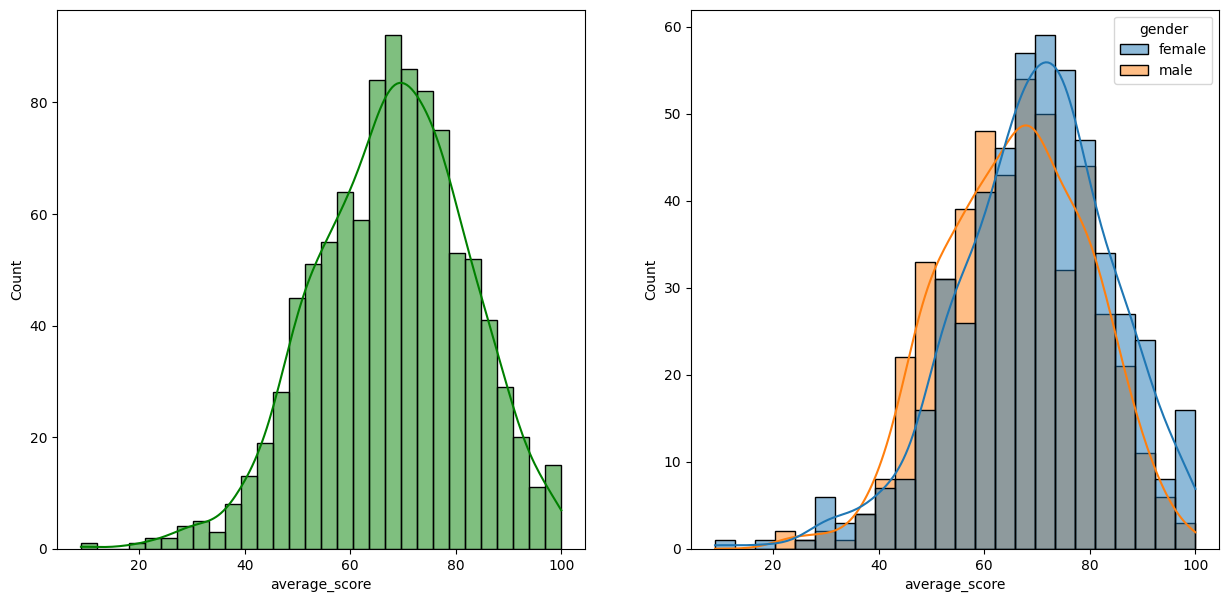

In [37]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average_score',kde=True,hue='gender')
plt.show()

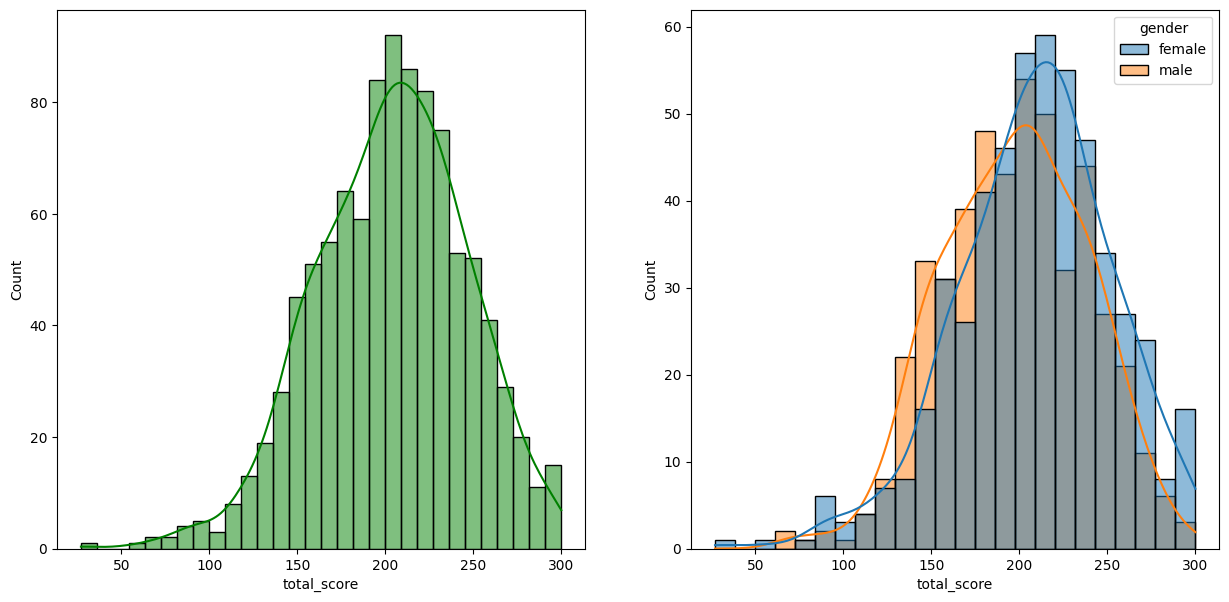

In [38]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x="total_score",kde=True,hue='gender')
plt.show()

Insights
* Female students tend to perform well then male students.

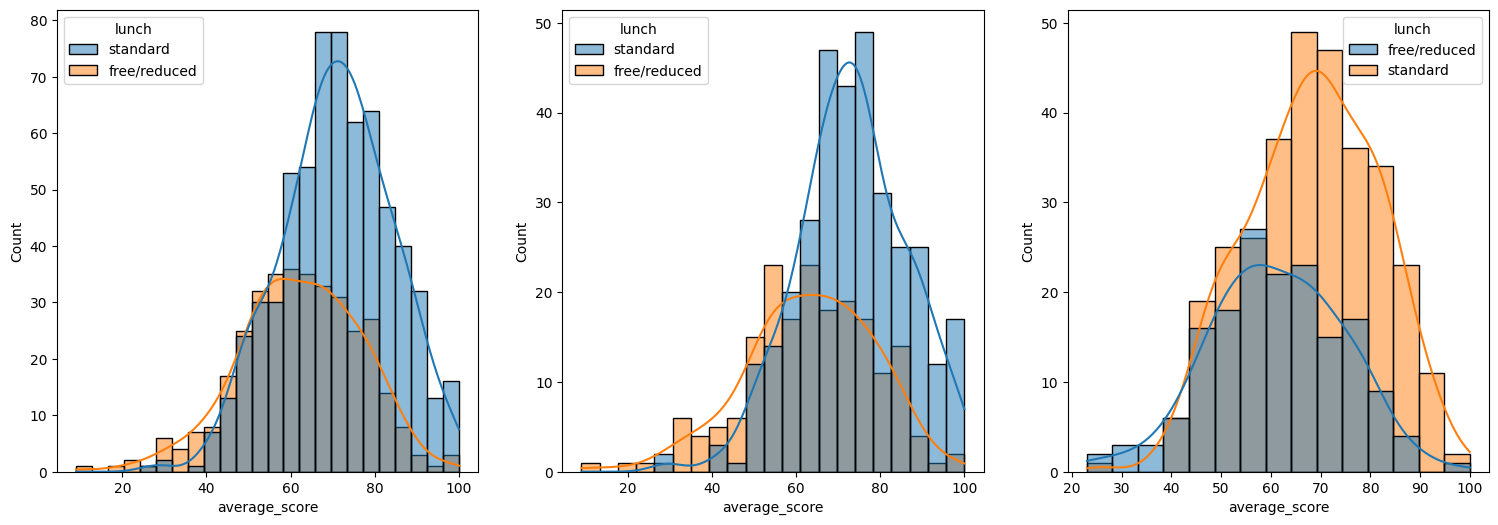

In [39]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average_score',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df['gender']=='female'],x='average_score',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df['gender']=='male'],x='average_score',kde=True,hue='lunch')
plt.show()

Insights
* Standard lunch helps perform well in exams for both male and female students

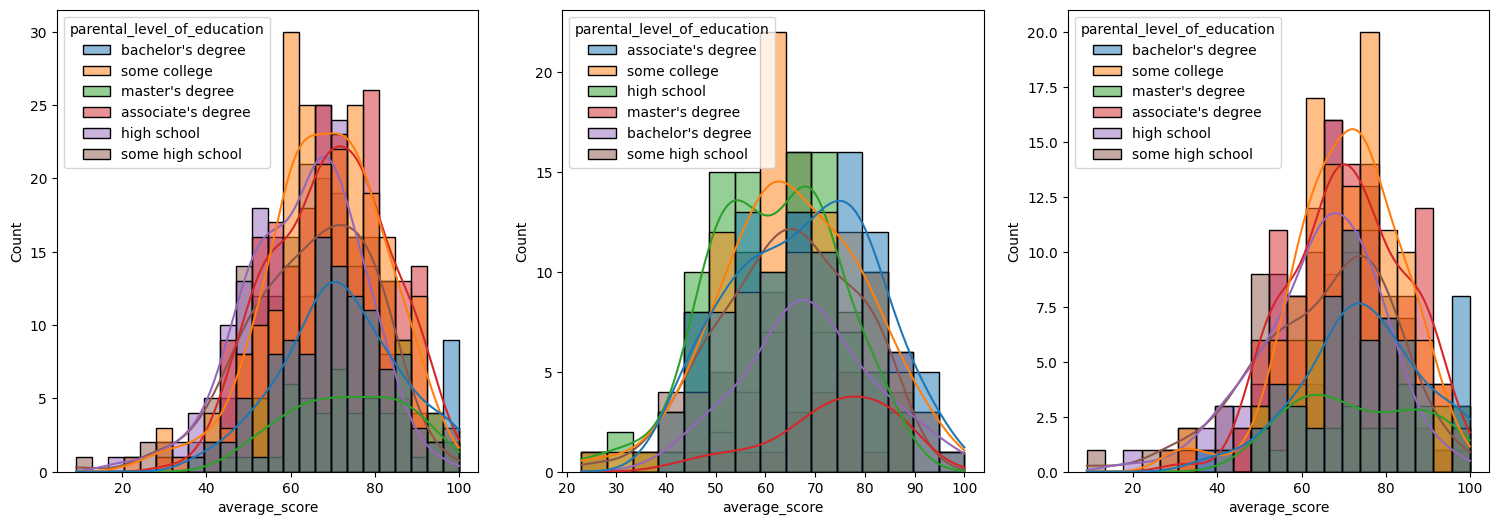

In [40]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='parental_level_of_education')
plt.show()


Insights
* Students of group A and group B tends to perform poorly in exam.
* Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

##### 5.2 Maximumum score of students in all three subjects

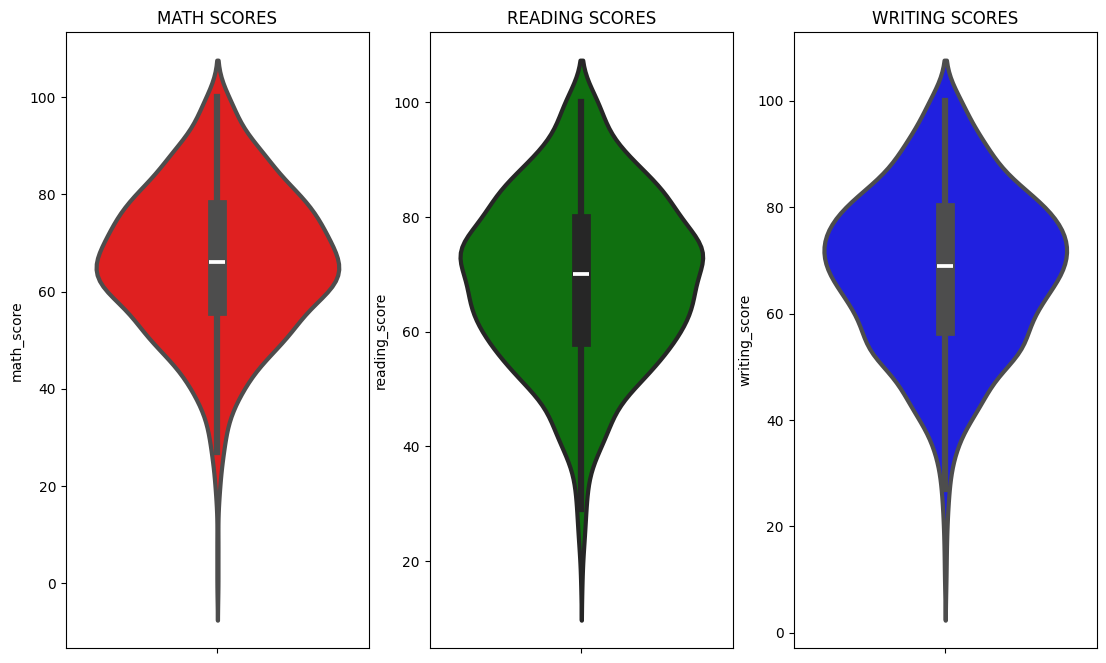

In [41]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

Insights
* From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

##### 5.3 Multivariate analysis using pieplot

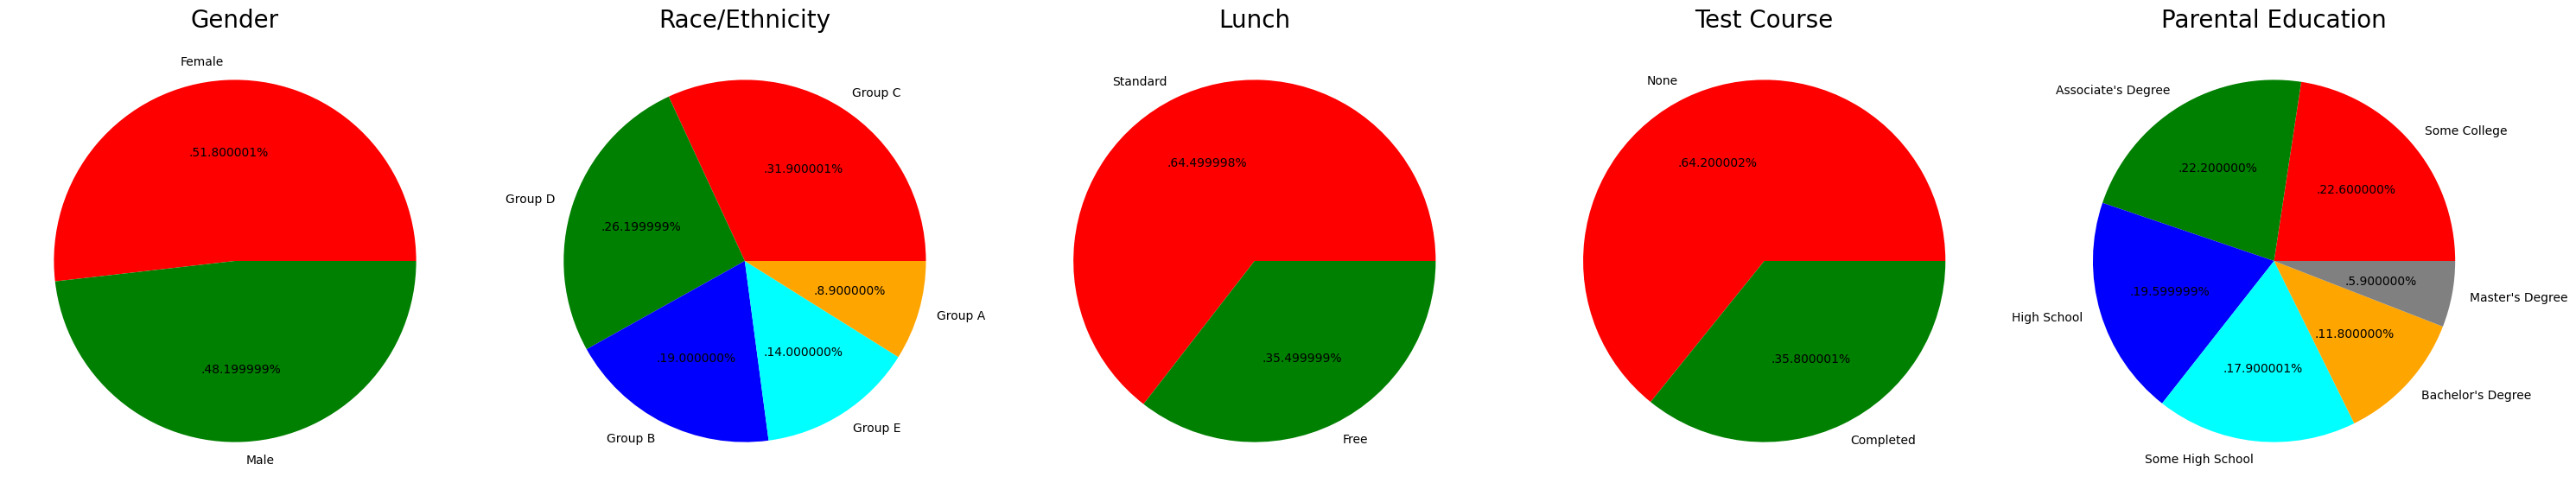

In [42]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

Insights
* Number of Male and Female students is almost equal
* Number students are greatest in Group C
* Number of students who have standard lunch are greater
* Number of students who have not enrolled in any test preparation course is greater
* Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

##### 5.4 Feature Wise Visualization

4.4.1 GENDER COLUMN
* How is distribution of Gender ?
* Is gender has any impact on student's performance ?

UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

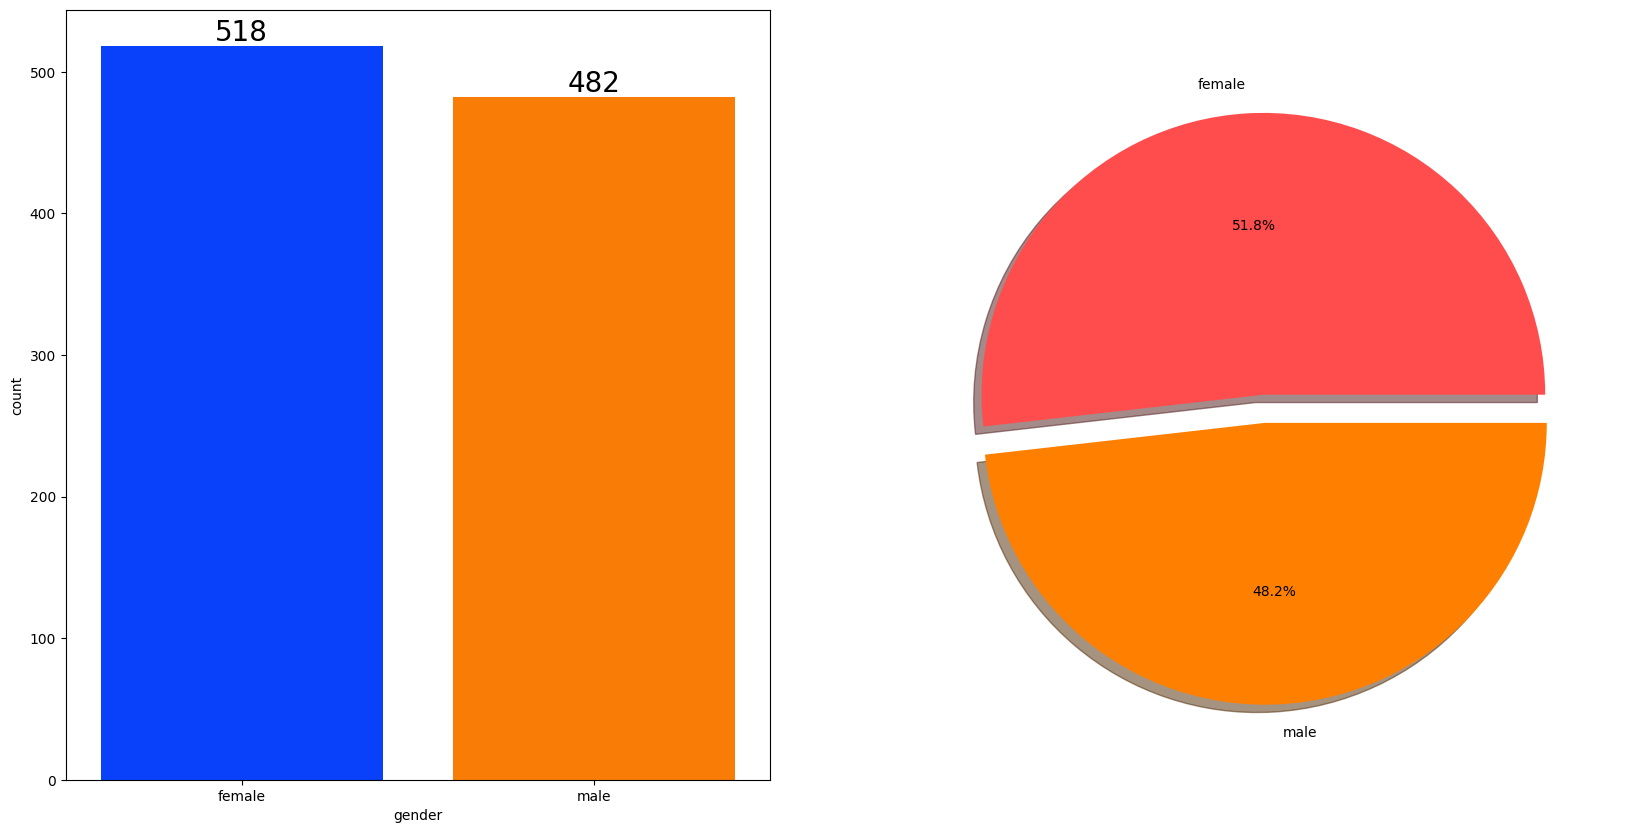

In [72]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=df['gender'].value_counts().index,explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

Insights
* Gender has balanced data with female students are 518 (52%) and male students are 482 (48%)

BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

In [54]:
gender_group = df.groupby('gender')
average_score_gender_wise_mean = gender_group['average_score'].mean()
math_score_gender_wise_mean = gender_group['math_score'].mean()

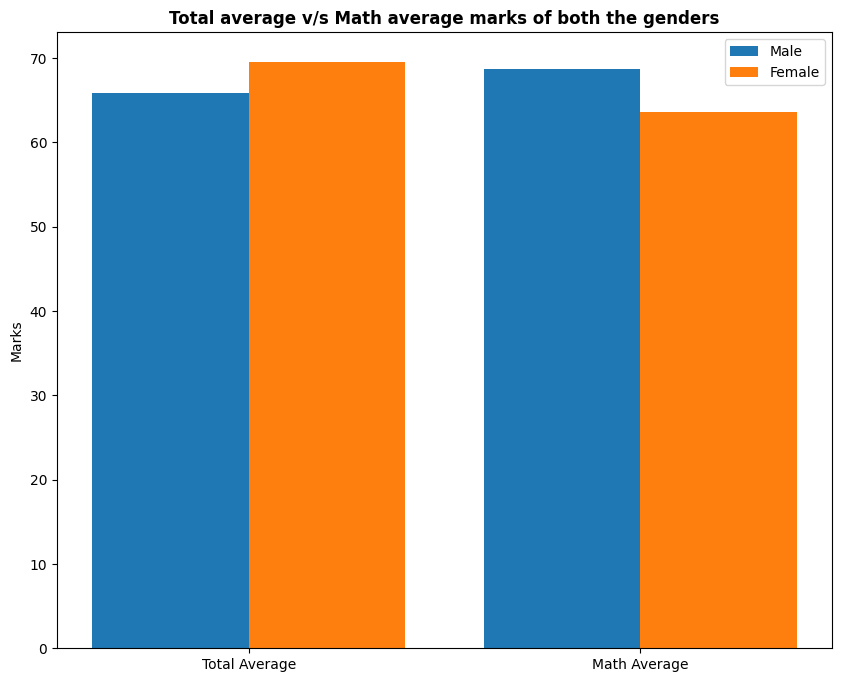

In [55]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [average_score_gender_wise_mean[0], math_score_gender_wise_mean[0]]
male_scores = [average_score_gender_wise_mean[1], math_score_gender_wise_mean[1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

Insights
* On an average females have a better overall score than men, whereas males have scored higher in Maths.

##### 5.4.2 RACE/EHNICITY COLUMN
* How is Group wise distribution ?
* Is Race/Ehnicity has any impact on student's performance ?

UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

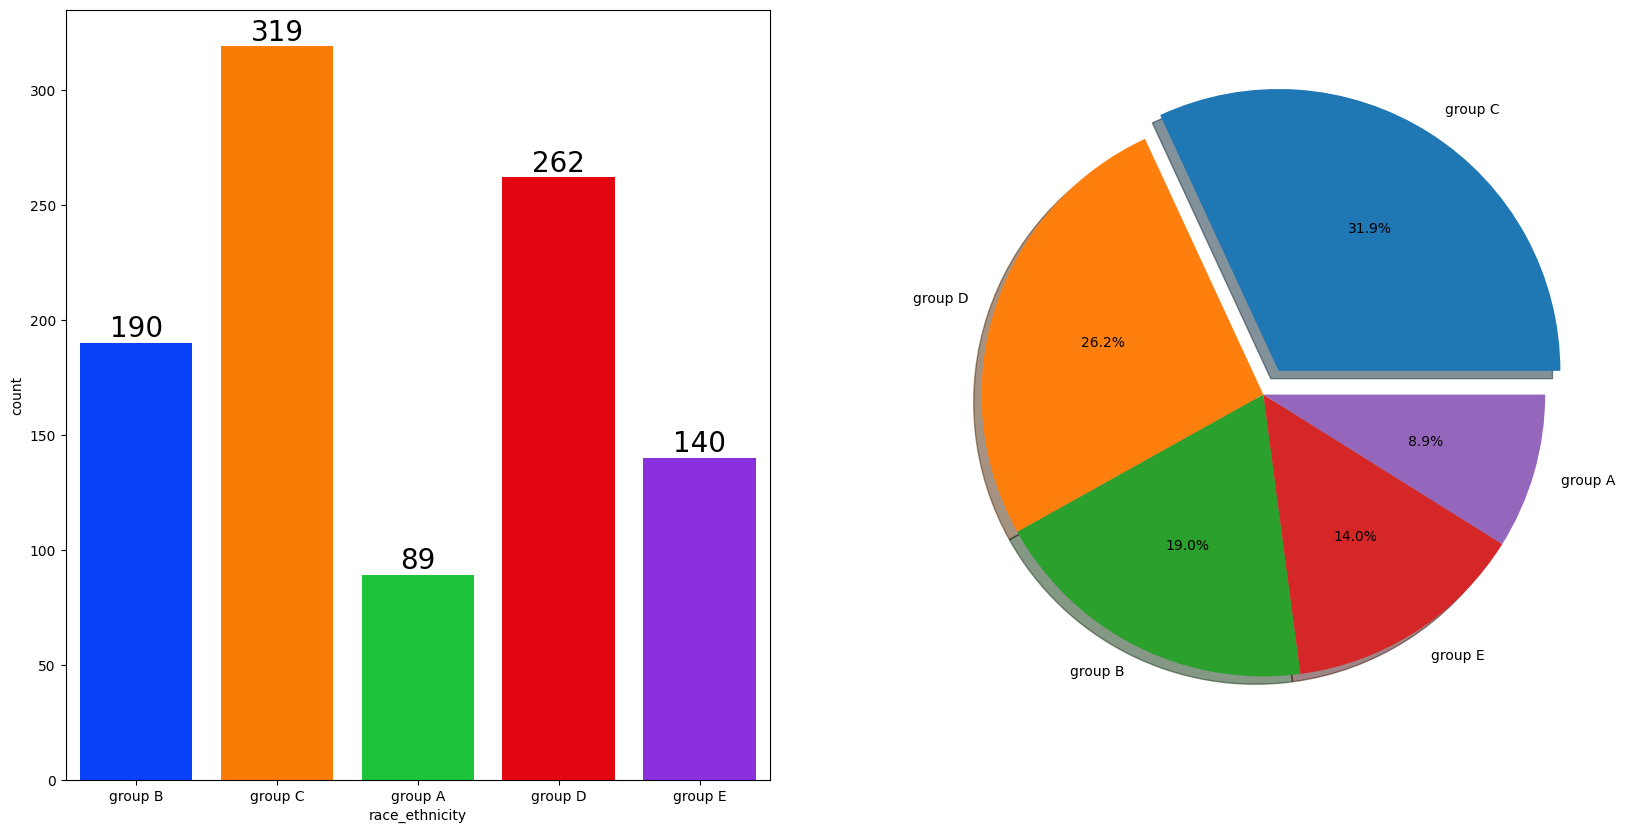

In [73]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

Insights
* Most of the student belonging from group C.
* Lowest number of students belong to groupA.

BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

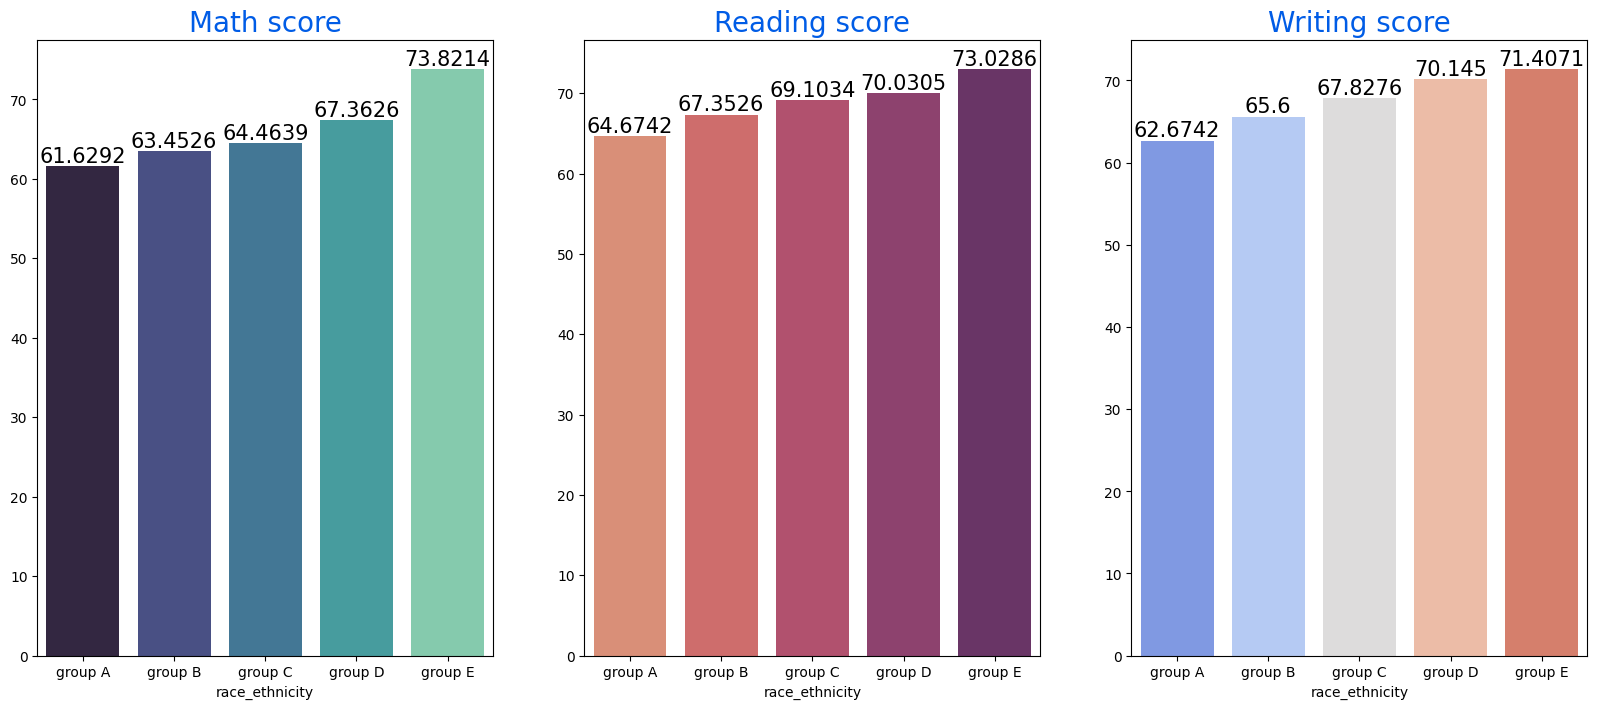

In [74]:
race_ethnicity_group=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=race_ethnicity_group['math_score'].mean().index,y=race_ethnicity_group['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=race_ethnicity_group['reading_score'].mean().index,y=race_ethnicity_group['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=race_ethnicity_group['writing_score'].mean().index,y=race_ethnicity_group['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)


Insights
* Group E students have scored the highest marks.
* Group A students have scored the lowest marks.
* Students from a lower Socioeconomic status have a lower avg in all course subjects

##### 5.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
* What is educational background of student's parent ?
* Is parental education has any impact on student's performance ?

UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

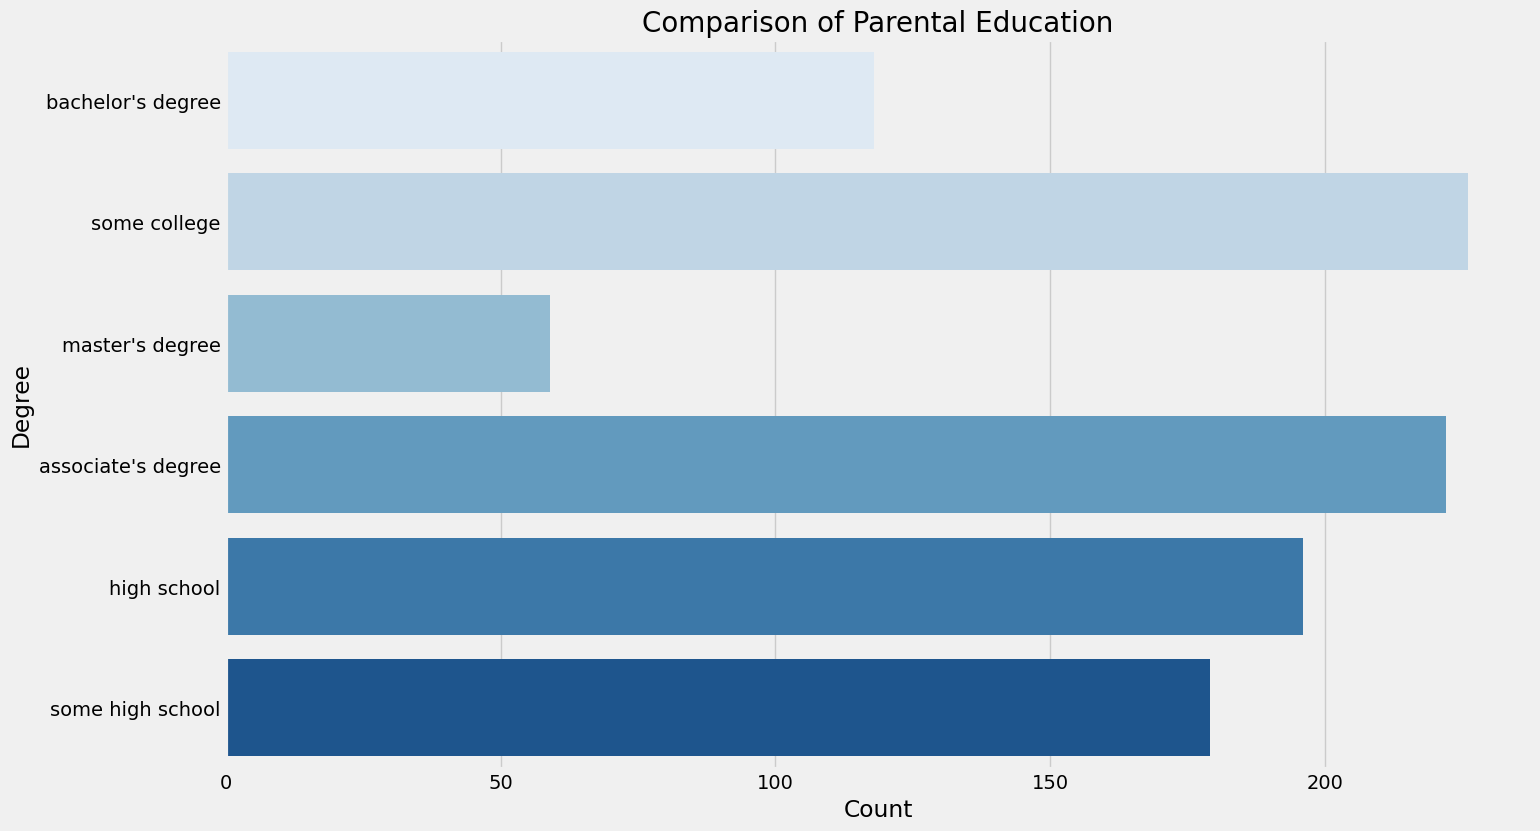

In [79]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Count')
plt.ylabel('Degree')
plt.show()

Insights
* Largest number of parents are from some college.

BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

In [87]:
df1 = df.loc[:,["parental_level_of_education","math_score","reading_score","writing_score"]]
df1

,parental_level_of_education,math_score,reading_score,writing_score
0,bachelor's degree,72,72,74
1,some college,69,90,88
2,master's degree,90,95,93
3,associate's degree,47,57,44
4,some college,76,78,75
...,...,...,...,...
995,master's degree,88,99,95
996,high school,62,55,55
997,high school,59,71,65
998,some college,68,78,77


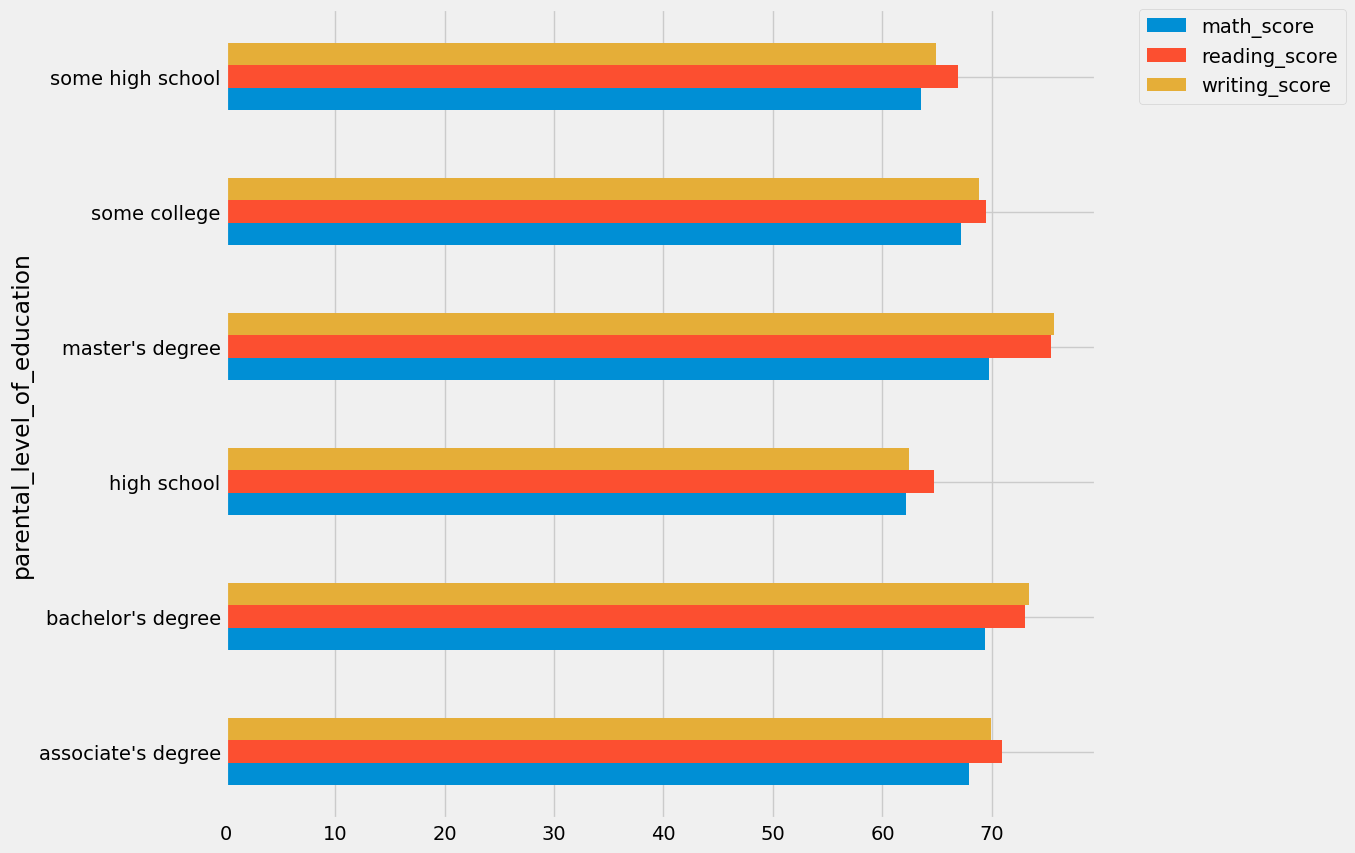

In [88]:
df1.groupby('parental_level_of_education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Insights
* The score of student whose parents possess master and bachelor level education are higher than others.
* As higher the parent's education, as higher their child marks

BIVARIATE ANALYSIS ( Is parental education has any impact on attending test preparation course ? )

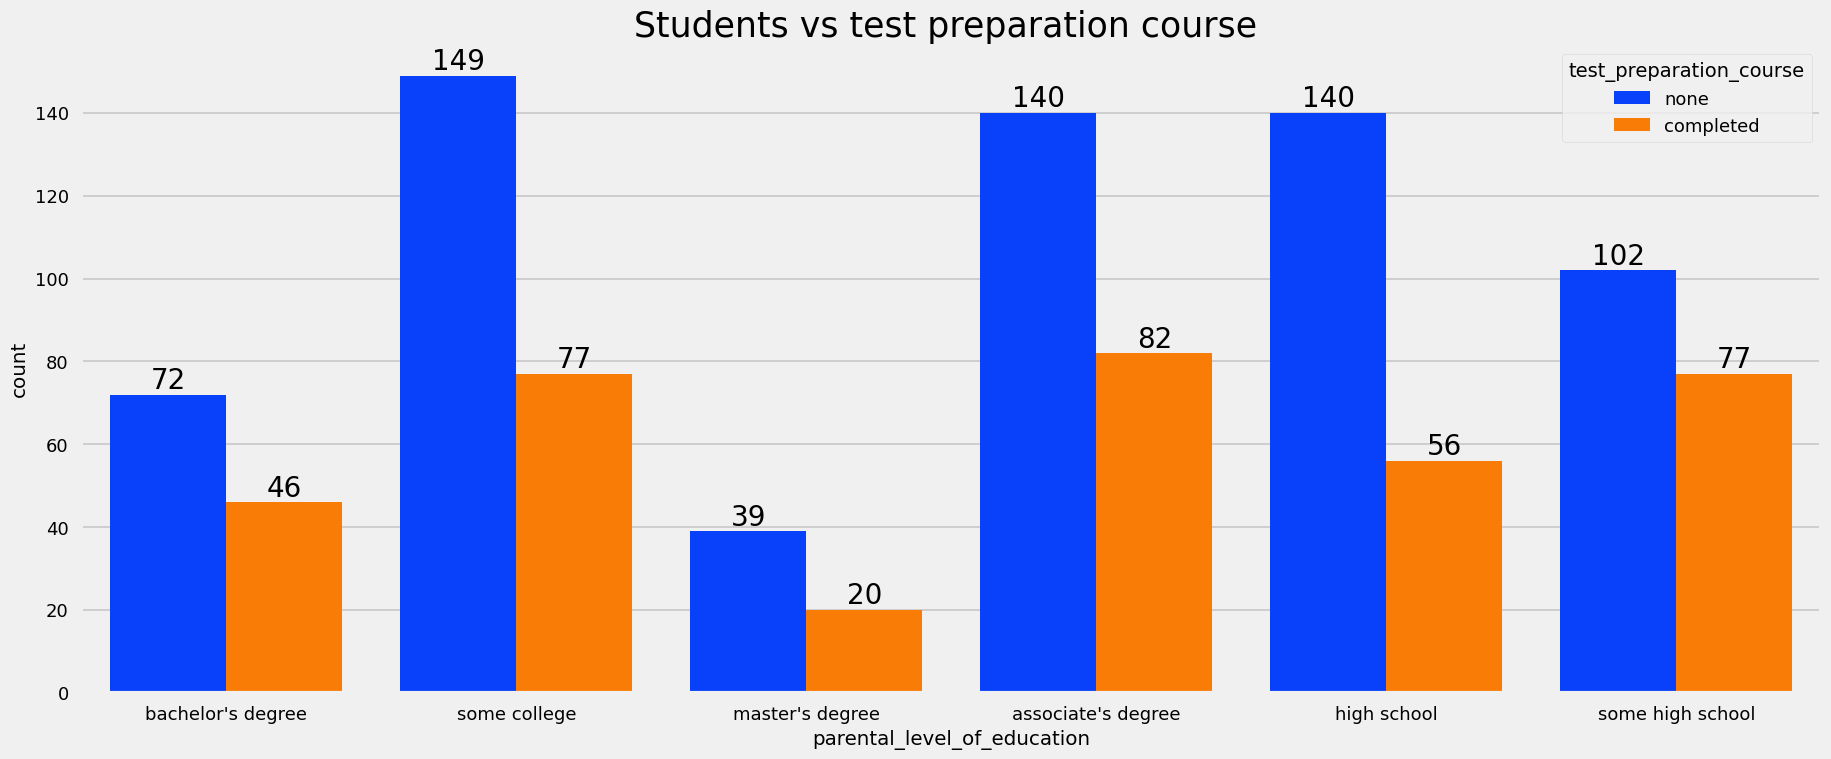

In [104]:
f,ax=plt.subplots(figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax)
ax.set_title('Students vs test preparation course ',color='black',size=25)
for container in ax.containers:
    ax.bar_label(container,color='black',size=20)
plt.show()

Insight
* Some high school degree holding parent's child attending percentage is more then other degree, but if we compare as no then the most attending class is associate's degree 
* In every class, the no of student attend in test preparation course is around 50% of not attend student

##### 5.4.4 LUNCH COLUMN
* Which type of lunch is most common amoung students ?
* What is the effect of lunch type on test results?

UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

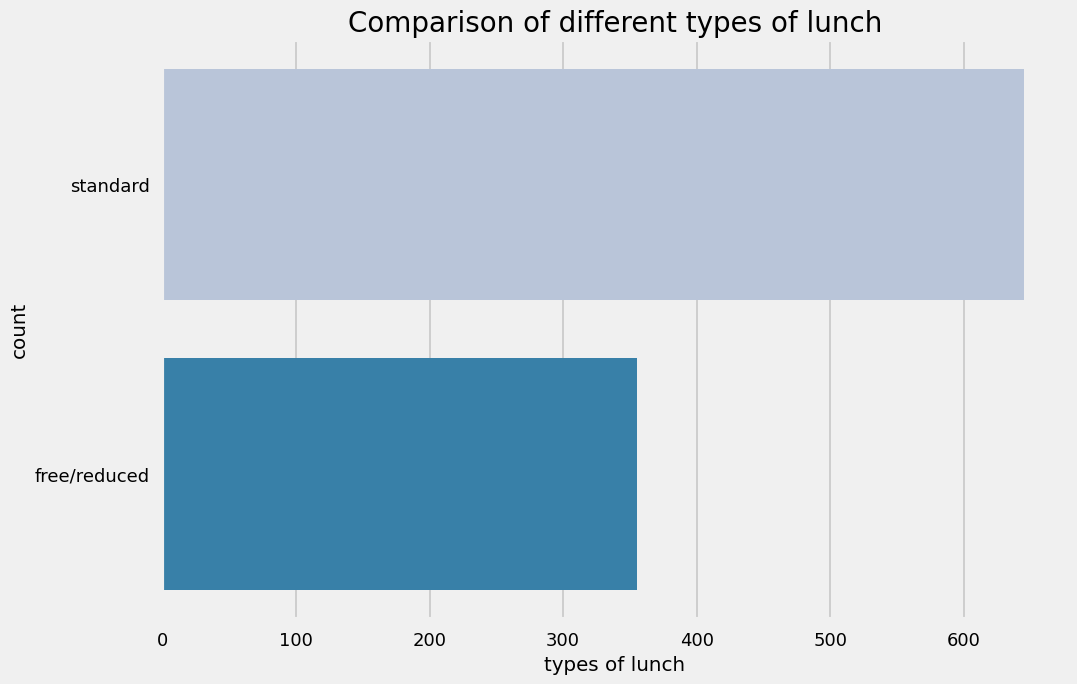

In [89]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

Insights
* Students being served Standard lunch was more than free lunch

BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )

In [105]:
df2 = df.loc[:,["lunch","math_score","reading_score","writing_score"]]
df2

,lunch,math_score,reading_score,writing_score
0,standard,72,72,74
1,standard,69,90,88
2,standard,90,95,93
3,free/reduced,47,57,44
4,standard,76,78,75
...,...,...,...,...
995,standard,88,99,95
996,free/reduced,62,55,55
997,free/reduced,59,71,65
998,standard,68,78,77


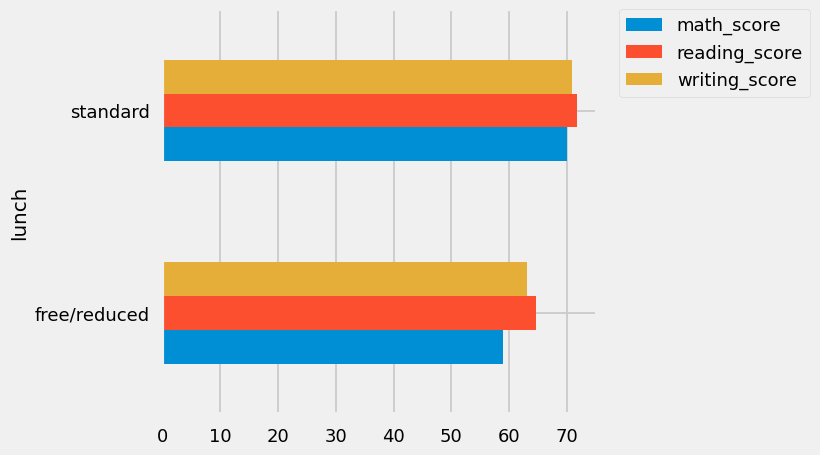

In [108]:
df2.groupby('lunch').agg('mean').plot(kind='barh',figsize=(5,5))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Insights
* Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

##### 5.4.5 TEST PREPARATION COURSE COLUMN
* Is Test prepration course has any impact on student's performance ?

BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

<Axes: xlabel='lunch', ylabel='writing_score'>

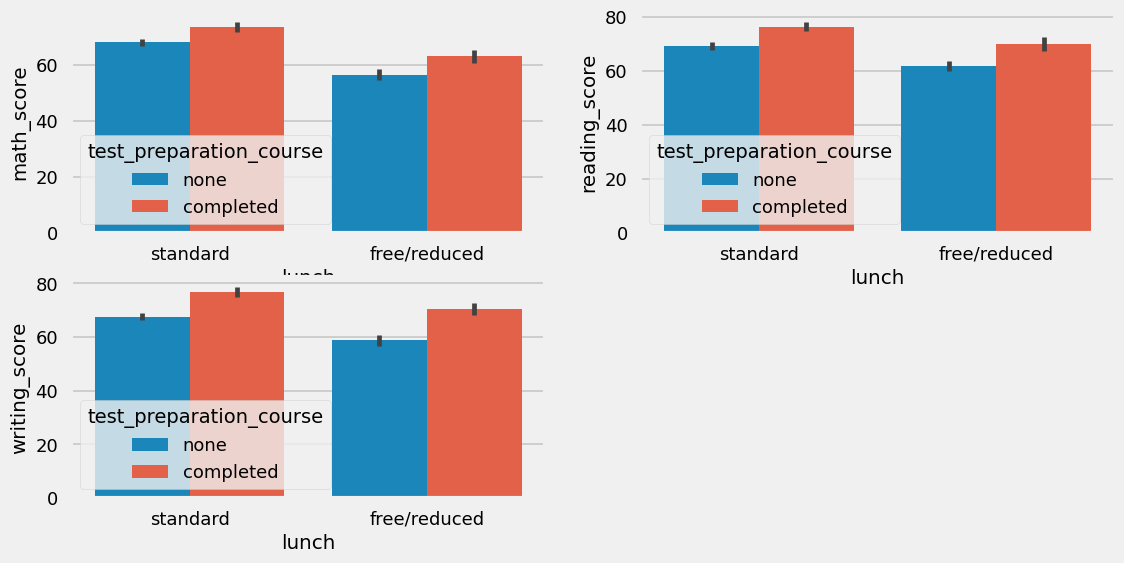

In [109]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

Insights
* Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course and also who took standard lunch, their result are better then free/reduced lunch

##### 5.4.6 CHECKING OUTLIERS

<Axes: ylabel='writing_score'>

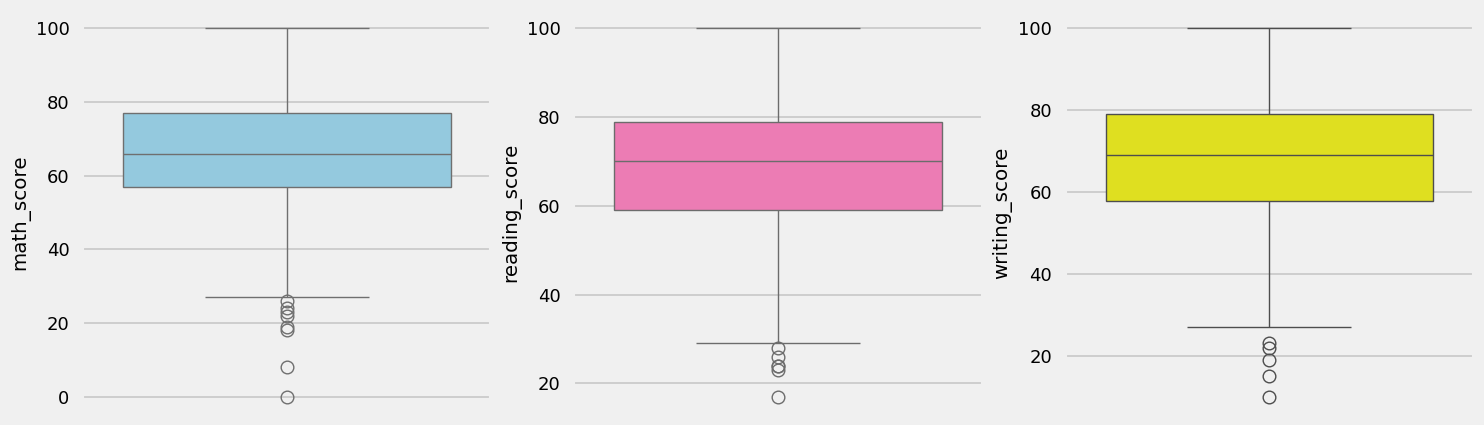

In [112]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(131)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(132)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(133)
sns.boxplot(df['writing_score'],color='yellow')

##### 5.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

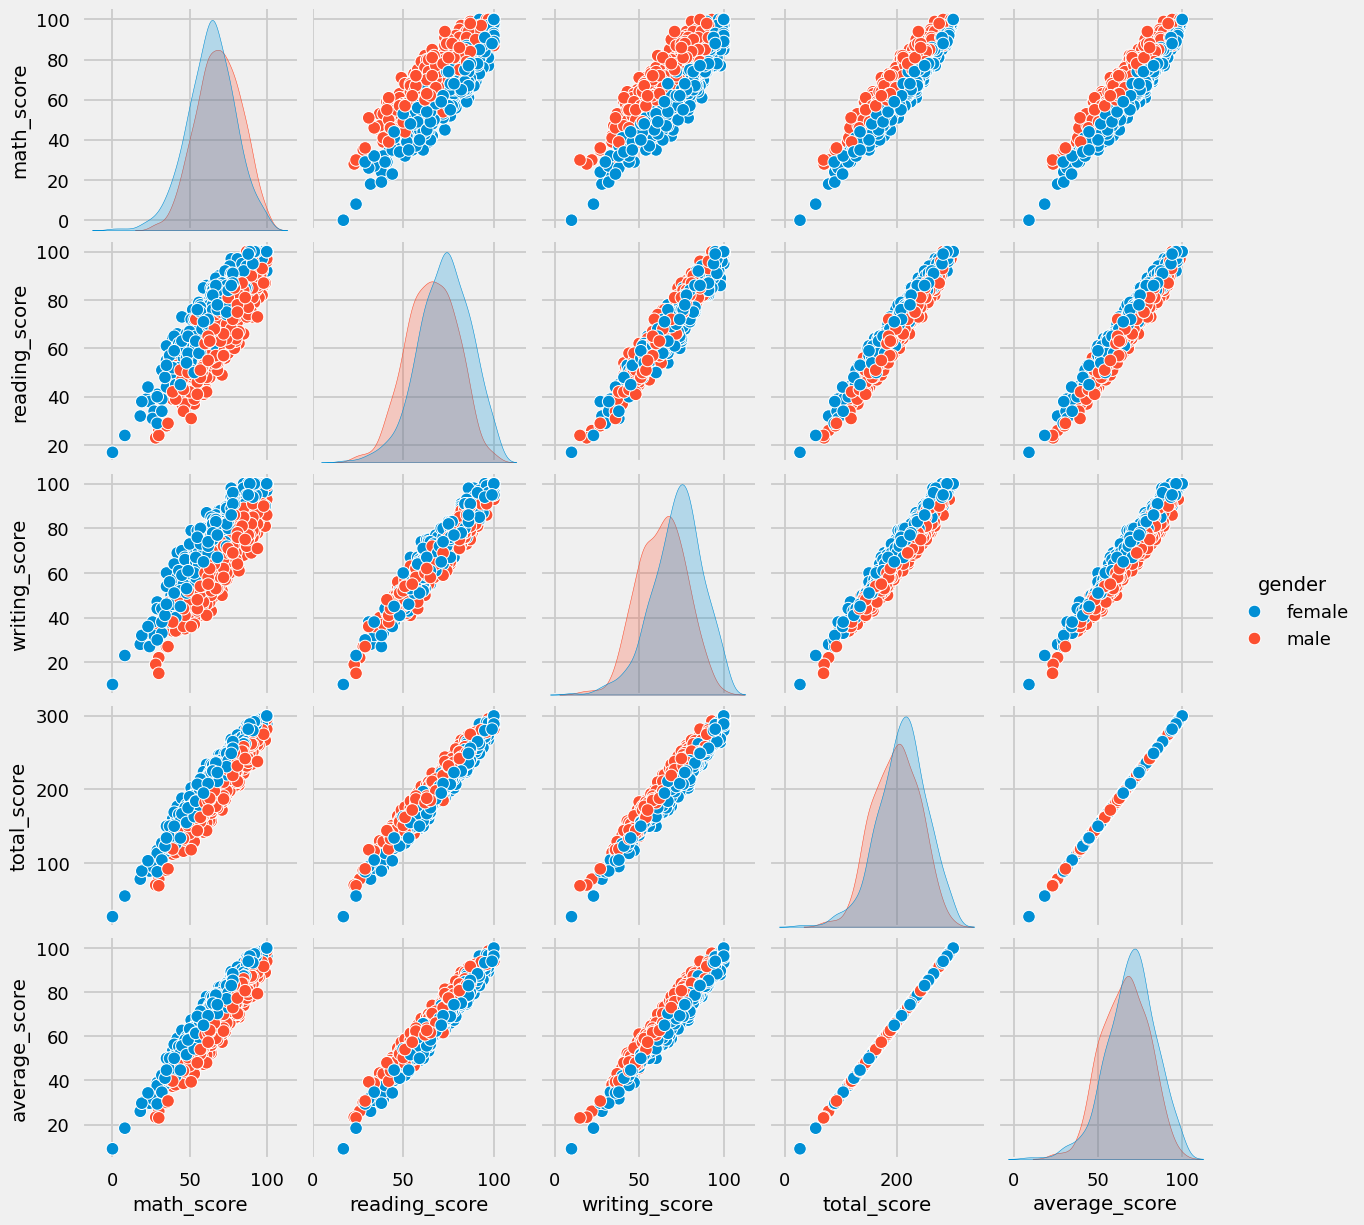

In [114]:
sns.pairplot(df,hue = 'gender')
plt.show()

Insights
* From the above plot it is clear that all the scores increase linearly with each other.

#### 6. Conclusions
* Student's Performance is related with lunch, race, parental level education
* Females lead in pass percentage and also are top-scorers
* Student's Performance is not much related with test preparation course
* Finishing preparation course is benefitial.